In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import os
import os.path as osp
import sys
sys.path.insert(0, osp.abspath(".."))
from utils import *
import seaborn as sns
from dataloader import *
import pandas as pd

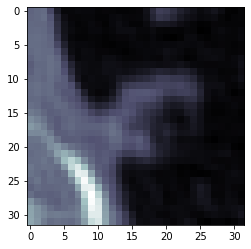

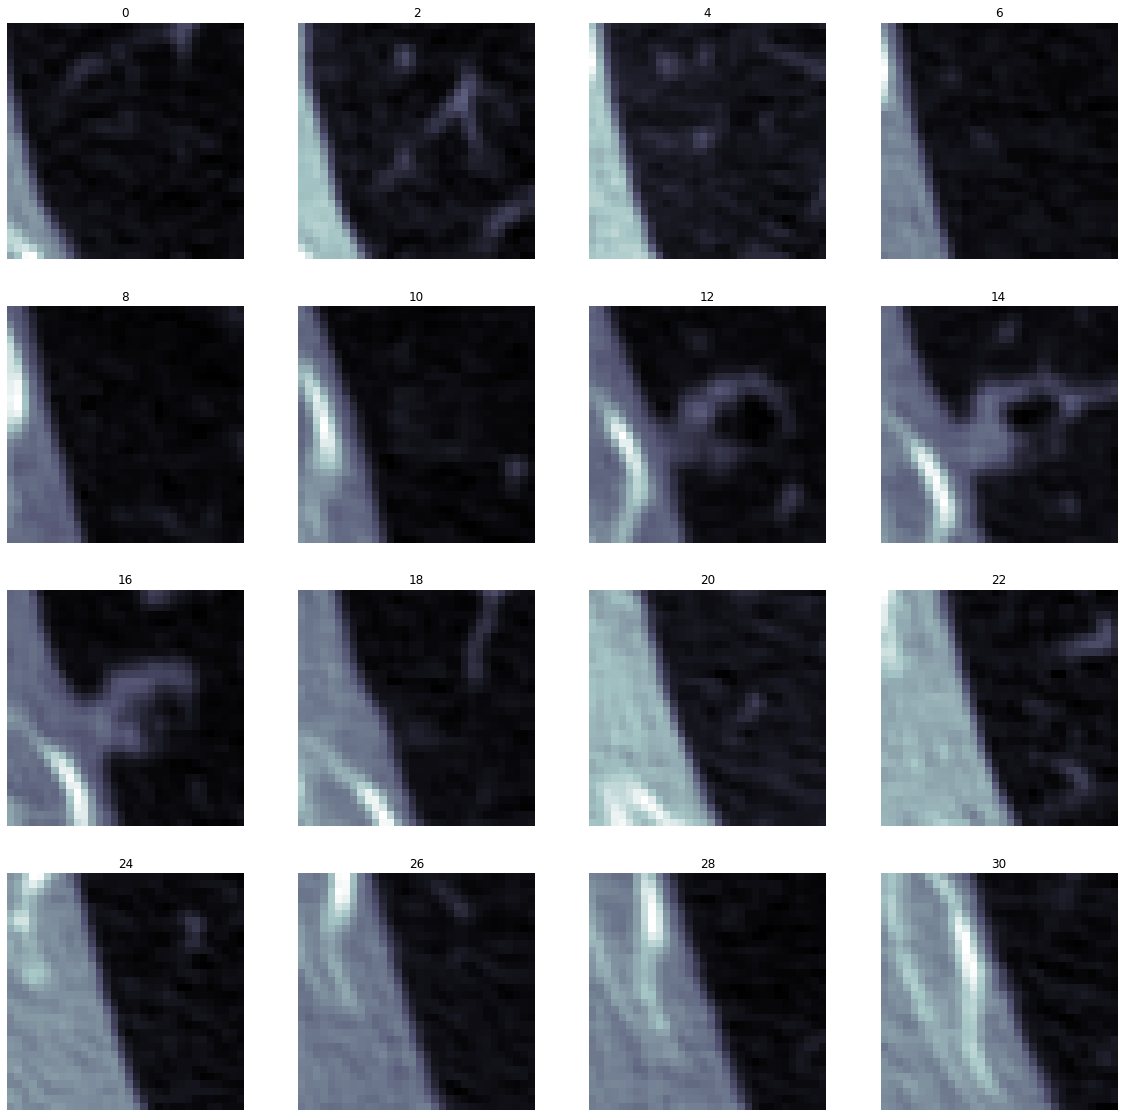

In [2]:
file_path = "/mnt/nlst/nparray2/208446_T1_1.npy"
nod_npy   = np.load(file_path)
nod_npy = np.asarray(nod_npy[ 16:48, 48:80, 48:80], dtype = np.float32)
nod_npy = (nod_npy - 443.16226803816096)/574.5850006260475
plt.figure(figsize=(4,4))
ax  = plt.gca()
ax.imshow(nod_npy[15,:,:], cmap="bone")
plot_slices(nod_npy[::-1,:,:], 0)

In [3]:
pred = np.load('../log/infer-multi-views-expr-4-nlst/preds-nlst-voting.npy')
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,

In [4]:
incorrect_nod_ids = list(np.where(pred == 0)[0])
print(incorrect_nod_ids)

[9, 28, 43, 46, 49, 51, 53, 84, 93, 111, 112, 140, 143, 155, 158, 161, 215, 238, 243, 294, 299]


<ipython-input-5-b1b09b3bcc9d>:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(4,4))


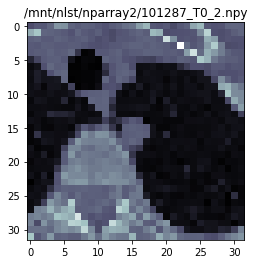

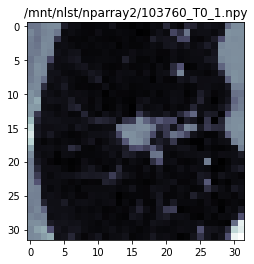

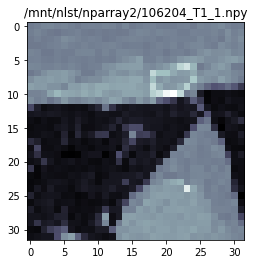

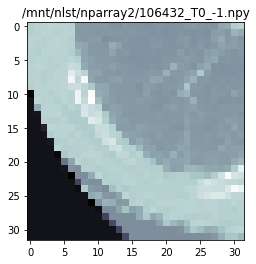

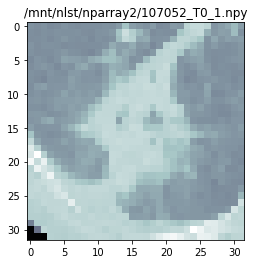

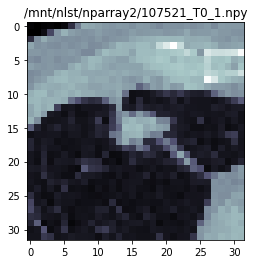

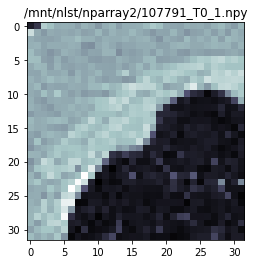

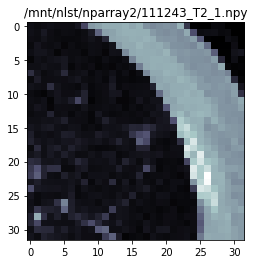

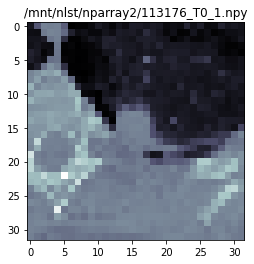

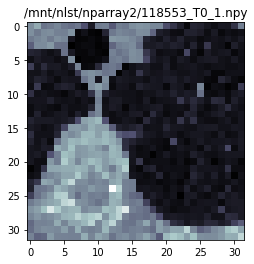

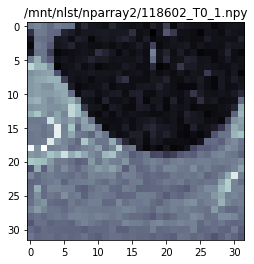

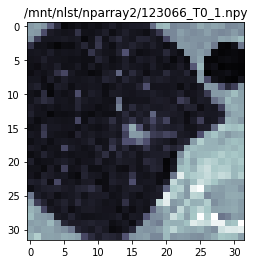

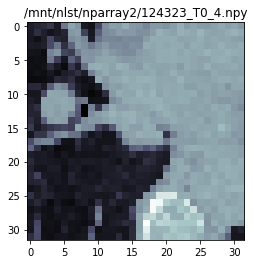

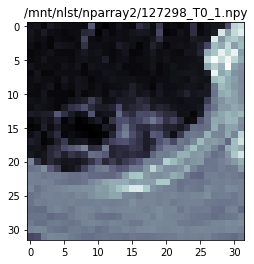

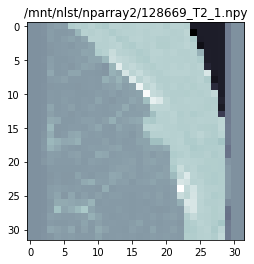

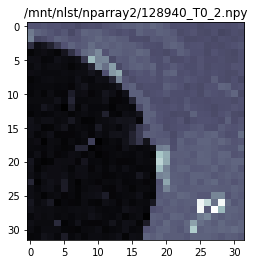

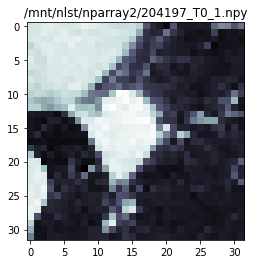

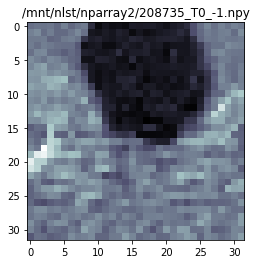

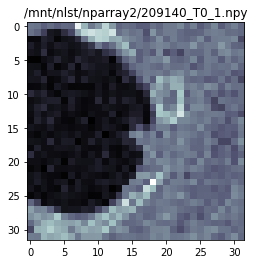

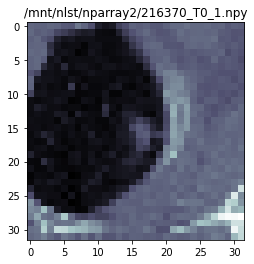

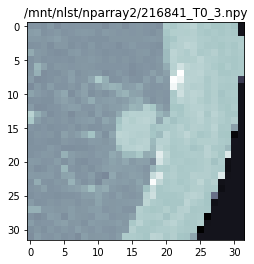

In [5]:
import glob
img_folder = '/mnt/nlst/nparray2/'
nodules = []
files = np.array(glob.glob(img_folder+'/*'))
files = files[incorrect_nod_ids]
for f in files:
    nod_npy   = np.load(f)
#     nod_npy = np.asarray(nod_npy[ 16:48, 48:80, 48:80], dtype = np.float32)
    nod_npy = ndimage.interpolation.zoom(nod_npy, [0.5,  0.25, 0.25])
    nodules.append(nod_npy)
    nod_npy = (nod_npy - 446.66314534876193)/576.2785657459063
    plt.figure(figsize=(4,4))
    plt.title(f)
    ax  = plt.gca()
    ax.imshow(nod_npy[15,:,:], cmap="bone")

In [ ]:
def plot_feature_vector(ax, idx):
    sns.heatmap(feat[:,idx,:].T, ax = ax,
                    vmin =0, vmax=2.5, cbar=False)
    ax.set_title("%d-[%d|%d]" %(idx, pred_lbl[idx], gts[idx]))
    ax.set_xticklabels(["o", "x", "y","z"])
    ax.vlines(np.arange(5), *ax.get_ylim(), color="yellow")

n_rows = 5
n_cols=8
fig, axs = plt.subplots(nrows=n_rows,ncols=n_cols,figsize=(16,16))
for i in range(n_rows):
    for j in range(n_cols):
        idx = (i * n_cols +j)
        plot_feature_vector(axs[i,j], idx)

In [ ]:
def plot_nodules(nods_lst, gts_lst, viz_lst, nrows=5, ncols=8, img_dir = "/home/hthieu/data/crop/"):
    fig, axs = plt.subplots(nrows=nrows,ncols=ncols,figsize=(ncols *4,nrows *4))
    for i in range(n_rows):
        for j in range(n_cols):
            idx = (i * n_cols +j)
            if idx >= len(viz_lst):
                return
            nod_npy   = np.load(osp.join(img_dir, nods_lst[viz_lst[idx]]+".npy"))
            col = "red" if gts_lst[viz_lst[idx]] == 1 else "green"
            axs[i][j].add_patch(patches.Rectangle((0,0),31, 31,linewidth=5, edgecolor=col, facecolor='none'))
            axs[i][j].imshow(nod_npy[15,:,:], cmap = "bone")
            axs[i][j].axis("off")
            axs[i][j].set_title(str(viz_lst[idx]))
plot_nodules(nod_ids, gts, np.arange(40))

In [ ]:
def plot_imgs_grid(viz_func, viz_lst, nrows=2, ncols=8):
    fig, axs = plt.subplots(nrows=nrows,ncols=ncols,figsize=(ncols *4,nrows *4))
    for i in range(n_rows):
        for j in range(n_cols):
            idx = (i * n_cols +j)
            if idx >= len(viz_lst):
                return
            viz_func(axs[i,j], viz_lst[idx])
plot_imgs_grid(plot_feature_vector, incorrect_preds)

In [ ]:
incorrect_preds = np.where(pred_lbl != gts)[0]
plot_nodules(nod_ids, gts, incorrect_preds)

In [ ]:
len(pred_lbl)